## IMPORT LIBRARIES

In [ ]:
#Import Libraries

import math
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm


## 01 Dataset Analysis

- Analyse the full dataset:
  - Describe the nature of each variable: numerical, categorical, ordinal
  - Add the main statistics depending on the nature of each variable:
    - mean, median, mode, sd, IQR, quartiles, range
  - Create a histogram for each variable
  - Create a piechart if the variable is binary
- Suppose that your dataset is a full population (only for this bulletpoint):
  - Calculate the minimum sample size needed and create a new dataset with this sample size
  - Compare the mean of the sample with the population and see if the population fall within the defined
confidence interval

In [ ]:
#Get dataset into a dataframe

path = 'https://raw.githubusercontent.com/prof-apartida/data-exercises/main/'
df = pd.read_csv(path+'Housing2.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4340000,4075,3,1,1,yes,yes,yes,no,no,2,no,semi-furnished
1,4340000,3500,4,1,2,yes,no,no,no,no,2,no,furnished
2,4340000,6450,4,1,2,yes,no,no,no,no,0,no,semi-furnished
3,4319000,4032,2,1,1,yes,no,yes,no,no,0,no,furnished
4,4305000,4400,2,1,1,yes,no,no,no,no,1,no,semi-furnished


In [ ]:
#Mean, median, mode, count, sd, quartiles
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,2.730000e+02,273.000000,273.000000,273.000000,273.000000,273.000000
mean,3.368590e+06,4128.406593,2.732601,1.109890,1.509158,0.468864
std,6.387660e+05,1570.274566,0.741322,0.335976,0.563038,0.771709
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,2.940000e+06,3150.000000,2.000000,1.000000,1.000000,0.000000
50%,3.430000e+06,3680.000000,3.000000,1.000000,1.000000,0.000000
75%,3.850000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000
max,4.340000e+06,12944.000000,6.000000,3.000000,3.000000,3.000000


In [ ]:
#Variables

var1 = 'price'
df_ = df[[var1]].dropna()
print(len(df))

var2 = 'area'
df_ = df[[var2]].dropna()
print(len(df))

var3 = 'bedrooms'
df_ = df[[var3]].dropna()
print(len(df))

var4 = 'bathrooms'
df_ = df[[var4]].dropna()
print(len(df))

var5 = 'stories'
df_ = df[[var5]].dropna()
print(len(df))

var6 = 'parking'
df_ = df[[var6]].dropna()
print(len(df))


273
273
273
273
273
273


In [ ]:
#Mean
mean1 = df[var1].mean()
N = len(df)
print('mean (price) =',mean1,'N =',N)

mean2 = df[var2].mean()
N = len(df)
print('mean (area) =',mean2,'N =',N)

mean3 = df[var3].mean()
N = len(df)
print('mean (bedrooms) =',mean3,'N =',N)

mean4 = df[var4].mean()
N = len(df)
print('mean (bathrooms) =',mean4,'N =',N)

mean5 = df[var5].mean()
N = len(df)
print('mean (stories) =',mean5,'N =',N)

mean6 = df[var6].mean()
N = len(df)
print('mean (parkings) =',mean6,'N =',N)

mean (price) = 3368589.7435897435 N = 273
mean (area) = 4128.406593406594 N = 273
mean (bedrooms) = 2.7326007326007327 N = 273
mean (bathrooms) = 1.10989010989011 N = 273
mean (stories) = 1.5091575091575091 N = 273
mean (parkings) = 0.46886446886446886 N = 273


In [ ]:
#Median
median1 = df[var1].median()
print('median (price) =',median1)

median2 = df[var2].median()
print('median (area) =',median2)

median3 = df[var3].median()
print('median (bedrooms) =',median3)

median4 = df[var4].median()
print('median (bathrooms) =',median4)

median5 = df[var5].median()
print('median (stories) =',median5)

median6 = df[var6].median()
print('median (parkings) =',median6)


median (price) = 3430000.0
median (area) = 3680.0
median (bedrooms) = 3.0
median (bathrooms) = 1.0
median (stories) = 1.0
median (parkings) = 0.0


In [ ]:
#Mode
mode1 = df[var1].mode()
print('mode (price) =',mode1)

mode2= df[var2].mode()
print('mode (area) =',mode2)

mode3 = df[var3].mode()
print('mode (bedrooms) =',mode3)

mode4 = df[var4].mode()
print('mode (bathrooms) =',mode4)

mode5 = df[var5].mode()
print('mode (stories) =',mode5)

mode6 = df[var6].mode()
print('mode (parkings) =',mode6)


mode (price) = 0    3500000
1    4200000
Name: price, dtype: int64
mode (area) = 0    3000
Name: area, dtype: int64
mode (bedrooms) = 0    3
Name: bedrooms, dtype: int64
mode (bathrooms) = 0    1
Name: bathrooms, dtype: int64
mode (stories) = 0    1
Name: stories, dtype: int64
mode (parkings) = 0    0
Name: parking, dtype: int64


In [ ]:
#Standard Deviation
std1 = df[var1].std()
print('std (price) =',std1)

std2 = df[var2].std()
print('std (area) =',std2)

std3 = df[var3].std()
print('std (bedrooms) =',std3)

std4 = df[var4].std()
print('std (bathrooms) =',std4)

std5 = df[var5].std()
print('std (stories) =',std5)

std6 = df[var6].std()
print('std (parkings) =',std6)

std (price) = 638766.0366821988
std (area) = 1570.2745660394821
std (bedrooms) = 0.7413219846007564
std (bathrooms) = 0.33597584331545705
std (stories) = 0.5630376718769324
std (parkings) = 0.7717087323551478


In [ ]:
#IQR and Qartiles
Q1 = np.quantile(df[var1], 0.25)
Q2 = np.quantile(df[var1], 0.50)
Q3 = np.quantile(df[var1], 0.75)
IQR = Q3 - Q1
print(f'IQR (price): {IQR}')
print(f'Q1 (price): {Q1}')
print(f'Q2 (price): {Q2}')
print(f'Q3 (price): {Q3}')

Q1 = np.quantile(df[var2], 0.25)
Q2 = np.quantile(df[var2], 0.50)
Q3 = np.quantile(df[var2], 0.75)
IQR = Q3 - Q1
print(f'IQR (area): {IQR}')
print(f'Q1 (area): {Q1}')
print(f'Q2 (area): {Q2}')
print(f'Q3 (area): {Q3}')

Q1 = np.quantile(df[var3], 0.25)
Q2 = np.quantile(df[var3], 0.50)
Q3 = np.quantile(df[var3], 0.75)
IQR = Q3 - Q1
print(f'IQR (bedrooms): {IQR}')
print(f'Q1 (bedrooms): {Q1}')
print(f'Q2 (bedrooms): {Q2}')
print(f'Q3 (bedrooms): {Q3}')

Q1 = np.quantile(df[var4], 0.25)
Q2 = np.quantile(df[var4], 0.50)
Q3 = np.quantile(df[var4], 0.75)
IQR = Q3 - Q1
print(f'IQR (bathrooms): {IQR}')
print(f'Q1 (bathrooms): {Q1}')
print(f'Q2 (bathrooms): {Q2}')
print(f'Q3 (bathrooms): {Q3}')

Q1 = np.quantile(df[var5], 0.25)
Q2 = np.quantile(df[var5], 0.50)
Q3 = np.quantile(df[var5], 0.75)
IQR = Q3 - Q1
print(f'IQR (stories): {IQR}')
print(f'Q1 (stories): {Q1}')
print(f'Q2 (stories): {Q2}')
print(f'Q3 (stories): {Q3}')

Q1 = np.quantile(df[var6], 0.25)
Q2 = np.quantile(df[var6], 0.50)
Q3 = np.quantile(df[var6], 0.75)
IQR = Q3 - Q1
print(f'IQR (parkings): {IQR}')
print(f'Q1 (parkings): {Q1}')
print(f'Q2 (parkings): {Q2}')
print(f'Q3 (parkings): {Q3}')



IQR (price): 910000.0
Q1 (price): 2940000.0
Q2 (price): 3430000.0
Q3 (price): 3850000.0
IQR (area): 1450.0
Q1 (area): 3150.0
Q2 (area): 3680.0
Q3 (area): 4600.0
IQR (bedrooms): 1.0
Q1 (bedrooms): 2.0
Q2 (bedrooms): 3.0
Q3 (bedrooms): 3.0
IQR (bathrooms): 0.0
Q1 (bathrooms): 1.0
Q2 (bathrooms): 1.0
Q3 (bathrooms): 1.0
IQR (stories): 1.0
Q1 (stories): 1.0
Q2 (stories): 1.0
Q3 (stories): 2.0
IQR (parkings): 1.0
Q1 (parkings): 0.0
Q2 (parkings): 0.0
Q3 (parkings): 1.0


In [ ]:
#Range

range_min1 = df[var1].min()
range_max1 = df[var1].max()
print('min value price:',range_min1, 'max value price:', range_max1)

range_min2 = df[var2].min()
range_max2 = df[var2].max()
print('min value area:',range_min2, 'max value area:', range_max2)

range_min3 = df[var3].min()
range_max3 = df[var3].max()
print('min value bedrooms:',range_min3, 'max value bedrooms:', range_max3)

range_min4 = df[var4].min()
range_max4 = df[var4].max()
print('min value bathrooms:',range_min4, 'max value bathrooms:', range_max4)

range_min5 = df[var5].min()
range_max5 = df[var5].max()
print('min value stories:',range_min5, 'max value stories:', range_max5)

range_min6 = df[var6].min()
range_max6 = df[var6].max()
print('min value parkings:',range_min6, 'max value parkings:', range_max6)

min value price: 1750000 max value price: 4340000
min value area: 1650 max value area: 12944
min value bedrooms: 1 max value bedrooms: 6
min value bathrooms: 1 max value bathrooms: 3
min value stories: 1 max value stories: 3
min value parkings: 0 max value parkings: 3


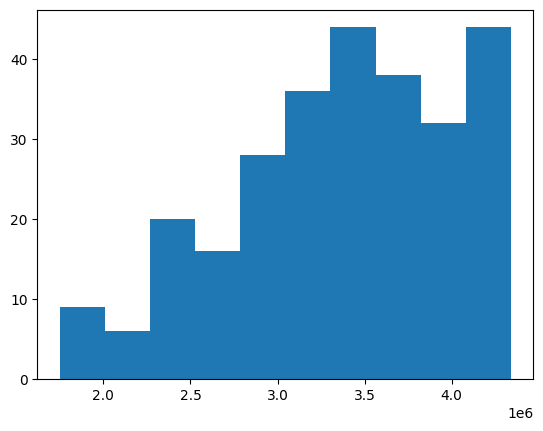

In [ ]:
#Histogram price
plt.show(plt.hist(df[var1]))

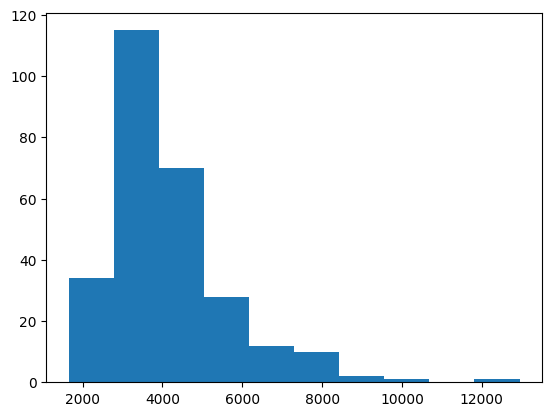

In [ ]:
#Histogram area
plt.show(plt.hist(df[var2]))

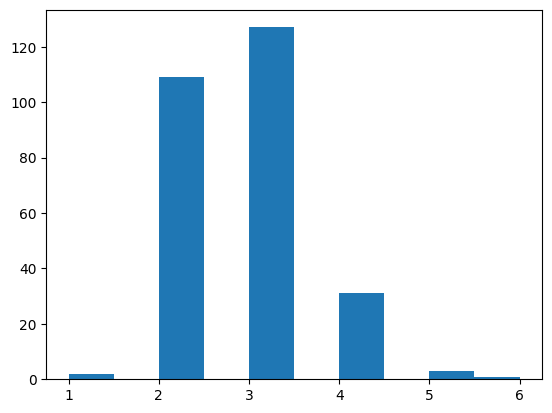

In [ ]:
#Histogram Bedrooms
plt.show(plt.hist(df[var3]))

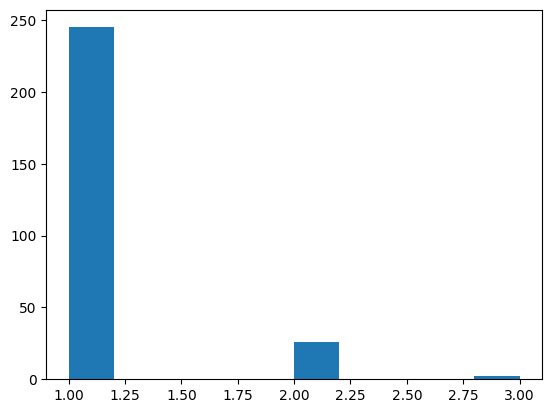

In [ ]:
#Histogram Bathrooms
plt.show(plt.hist(df[var4]))

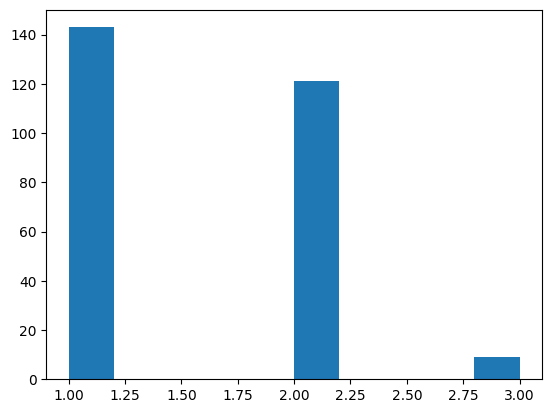

In [ ]:
#Histogram Stories
plt.show(plt.hist(df[var5]))

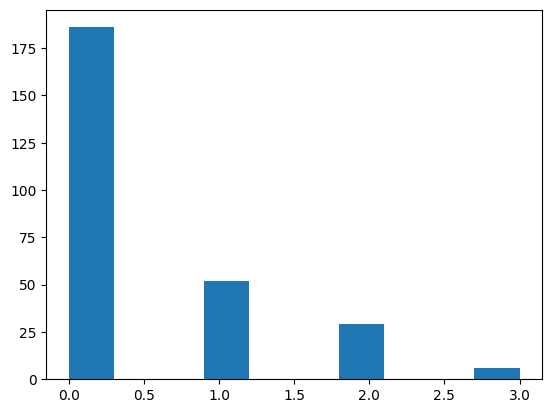

In [ ]:
#Histogram Parkings
plt.show(plt.hist(df[var6]))

#### Categorical variables

In [ ]:
#Variables
var7= 'furnishingstatus'
df_ = df[[var1]].dropna()
print(len(df))

273


In [ ]:
#Mode
mode7 = df[var7].mode()
print('mode (parkings)', mode7)

mode (parkings) 0    unfurnished
Name: furnishingstatus, dtype: object


In [ ]:
numeric_cols = []
categorical_cols = []
datetime_cols = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric_cols.append(col)
    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        datetime_cols.append(col)
    else:
        categorical_cols.append(col)

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)
print("Datetime Columns:", datetime_cols)

Numeric Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical Columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Datetime Columns: []


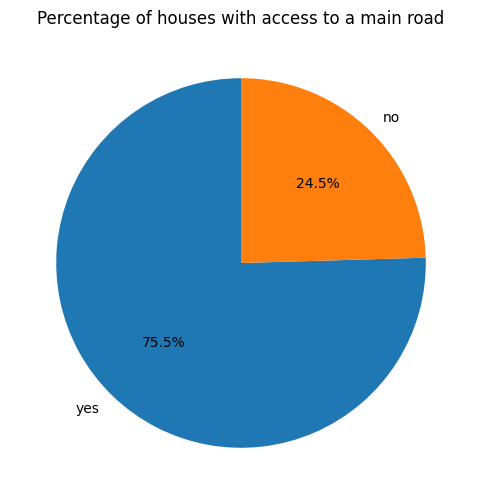

In [ ]:
binary_counts_mainroad = df['mainroad'].value_counts()

binary_counts_mainroad.plot.pie(autopct='%1.1f%%', labels=['yes', 'no'], startangle=90, figsize=(6, 6))

plt.title('Percentage of houses with access to a main road')

plt.ylabel('')
plt.show()

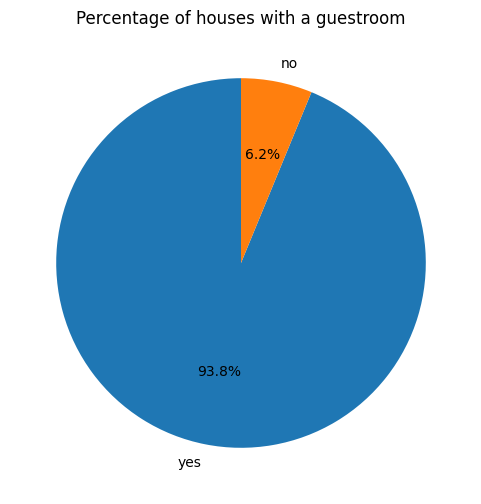

In [ ]:
binary_counts_guestroom = df['guestroom'].value_counts()

binary_counts_guestroom.plot.pie(autopct='%1.1f%%', labels=['yes', 'no'], startangle=90, figsize=(6, 6))

plt.title('Percentage of houses with a guestroom')

plt.ylabel('')
plt.show()

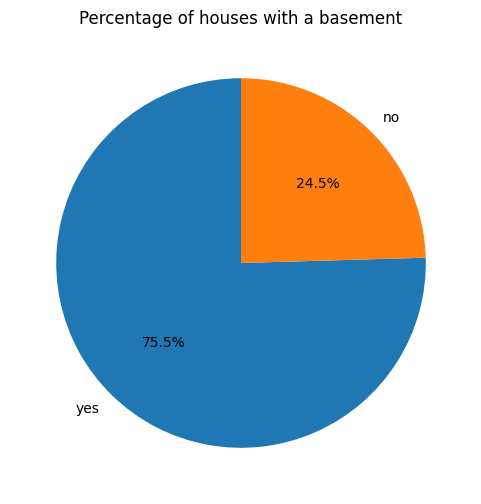

In [ ]:
binary_counts_basement = df['basement'].value_counts()

binary_counts_basement.plot.pie(autopct='%1.1f%%', labels=['yes', 'no'], startangle=90, figsize=(6, 6))

plt.title('Percentage of houses with a basement')

plt.ylabel('')
plt.show()

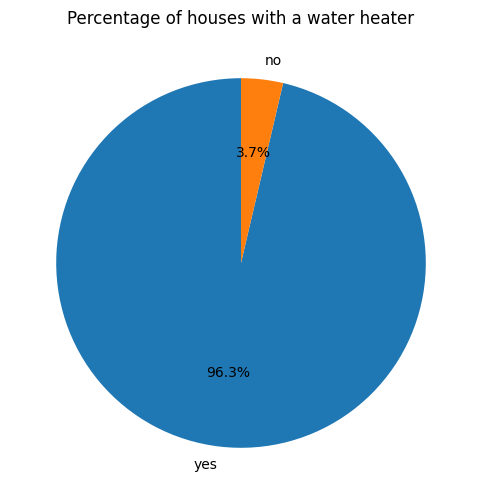

In [ ]:
binary_counts_hotwaterheating = df['hotwaterheating'].value_counts()

binary_counts_hotwaterheating.plot.pie(autopct='%1.1f%%', labels=['yes', 'no'], startangle=90, figsize=(6, 6))

plt.title('Percentage of houses with a water heater')

plt.ylabel('')
plt.show()

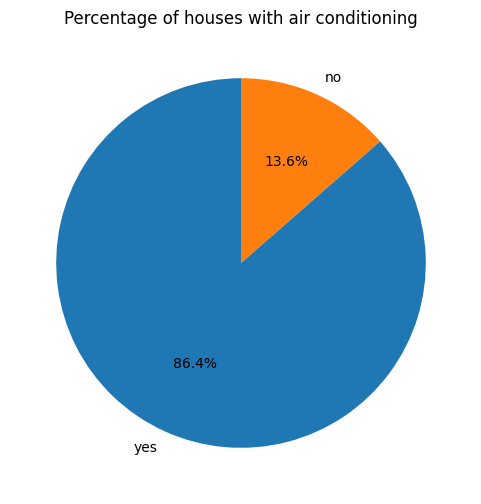

In [ ]:
binary_counts_airconditioning = df['airconditioning'].value_counts()

binary_counts_airconditioning.plot.pie(autopct='%1.1f%%', labels=['yes', 'no'], startangle=90, figsize=(6, 6))

plt.title('Percentage of houses with air conditioning')

plt.ylabel('')
plt.show()

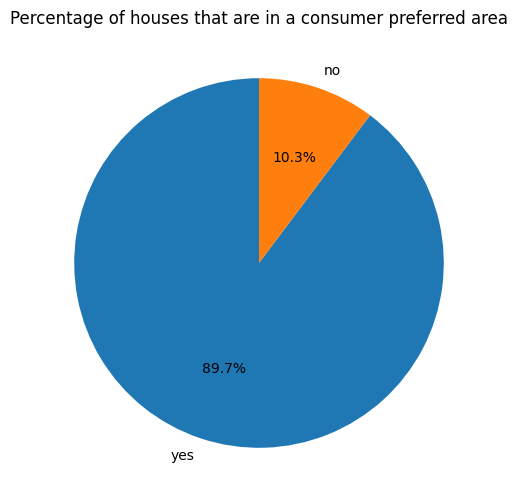

In [ ]:
binary_counts_prefarea = df['prefarea'].value_counts()

binary_counts_prefarea.plot.pie(autopct='%1.1f%%', labels=['yes', 'no'], startangle=90, figsize=(6, 6))

plt.title('Percentage of houses that are in a consumer preferred area')

plt.ylabel('')
plt.show()

## 02 Sample Testing

- Calculate the minimum sample size needed and create a new dataset with this sample size
- Compare the mean of the sample with the population and see if the population fall within the defined
confidence interval

In [ ]:
housing = pd.read_csv(path+'Housing2.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4340000,4075,3,1,1,yes,yes,yes,no,no,2,no,semi-furnished
1,4340000,3500,4,1,2,yes,no,no,no,no,2,no,furnished
2,4340000,6450,4,1,2,yes,no,no,no,no,0,no,semi-furnished
3,4319000,4032,2,1,1,yes,no,yes,no,no,0,no,furnished
4,4305000,4400,2,1,1,yes,no,no,no,no,1,no,semi-furnished


In [2]:

#CALCULATE n SIZE
# Sample Size
#n =

# Population Size Update with DATABASE
N = len(housing.price)

# Standard Deviation
p = 0.5

#confidence level
confidence = 0.95

# z-val
z = st.norm.ppf(confidence+((1-confidence)/2))

# margin or error
e = 0.05

n = (z**2*p*(1-p))/(e**2)
n = round(n)
sample_size = n/(1+(((z**2)*p*(1-p))/((e**2)*N))) # Sample size for a limited population
sample_size = round(sample_size)

print(n)
print(sample_size, 'sample size')

NameError: name 'housing' is not defined

In [ ]:
#get the sample
sample = housing.sample(n = sample_size)

sample

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
163,3290000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
10,4270000,2175,3,1,2,no,yes,yes,no,yes,0,no,unfurnished
248,2450000,7700,2,1,1,yes,no,no,no,no,0,no,unfurnished
111,3570000,4500,4,2,2,yes,no,yes,no,no,2,no,furnished
237,2590000,3600,2,2,2,yes,no,yes,no,no,1,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
178,3150000,3450,3,1,2,yes,no,yes,no,no,0,no,semi-furnished
219,2835000,2640,2,1,1,no,no,no,no,no,1,no,furnished
37,4130000,4632,4,1,2,yes,no,no,no,yes,0,no,semi-furnished


In [ ]:
sample_area_mean = sample['area'].mean()

pop_area_mean = housing['area'].mean()

pop_area_sd = housing['area'].std()

print(pop_area_mean, ' population Area Mean')
print(pop_area_sd, 'Population Standard Deviation')
print(sample_area_mean, 'Sample Area Mean')


#Should I use the standard deviation of the population or convert 0.5 sd to out new mean

area_lower_limit = pop_area_mean - z*(pop_area_sd/math.sqrt(sample_size))
print(area_lower_limit, 'Lower Limit')

area_upper_limit = pop_area_mean + z*(pop_area_sd/math.sqrt(sample_size))
print(area_upper_limit, 'Upper Limit')


4128.406593406594  population Area Mean
1570.2745660394821 Population Standard Deviation
4018.15625 Sample Area Mean
3885.094499560226 Lower Limit
4371.718687252962 Upper Limit


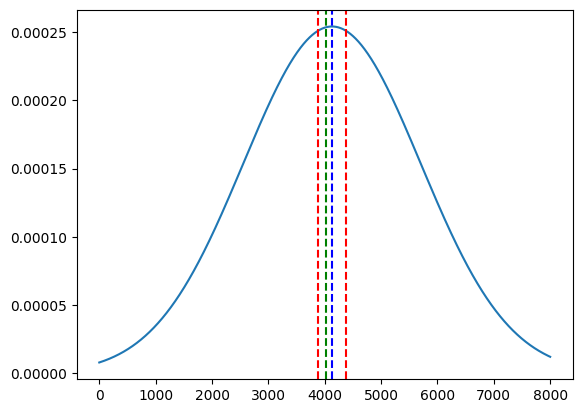

In [ ]:
avg = pop_area_mean
std = pop_area_sd

x_axis = np.arange(0, 8000, 1)
y_axis = st.norm.pdf(x_axis, avg, std)

import matplotlib.pyplot as plt

plt.plot(x_axis, y_axis)
plt.axvline(x=avg, color='blue', linestyle='--', label='Population Average')
plt.axvline(x=sample_area_mean, color='green', linestyle='--', label='Sample Average')
plt.axvline(x=area_upper_limit, color='red', linestyle='--', label='Upper Limit')
plt.axvline(x=area_lower_limit, color='red', linestyle='--', label='Lower Limit')


## 03 Hypothesis Testing

- With the full dataset, perform hypothesis testing for determined variables based on your group
    - Price vs Furnishing status
    - Price vs number of bedrooms

In [ ]:
housing = pd.read_csv(path+'Housing2.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4340000,4075,3,1,1,yes,yes,yes,no,no,2,no,semi-furnished
1,4340000,3500,4,1,2,yes,no,no,no,no,2,no,furnished
2,4340000,6450,4,1,2,yes,no,no,no,no,0,no,semi-furnished
3,4319000,4032,2,1,1,yes,no,yes,no,no,0,no,furnished
4,4305000,4400,2,1,1,yes,no,no,no,no,1,no,semi-furnished


###  Mood's median Test

#### Price vs furnishing status

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             273 non-null    int64 
 1   area              273 non-null    int64 
 2   bedrooms          273 non-null    int64 
 3   bathrooms         273 non-null    int64 
 4   stories           273 non-null    int64 
 5   mainroad          273 non-null    object
 6   guestroom         273 non-null    object
 7   basement          273 non-null    object
 8   hotwaterheating   273 non-null    object
 9   airconditioning   273 non-null    object
 10  parking           273 non-null    int64 
 11  prefarea          273 non-null    object
 12  furnishingstatus  273 non-null    object
dtypes: int64(6), object(7)
memory usage: 27.9+ KB


In [ ]:
housing['furnishingstatus'].unique()

array(['semi-furnished', 'furnished', 'unfurnished'], dtype=object)

In [ ]:
housing['furnishingstatus'].isnull().sum()

0

In [ ]:
semi_furnished = housing[housing['furnishingstatus'] == 'semi-furnished']
furnished = housing[housing['furnishingstatus'] == 'furnished']
unfurnished = housing[housing['furnishingstatus'] == 'unfurnished']

sf_group = semi_furnished['price']
f_group = furnished['price']
unf_group = unfurnished['price']

st.median_test(sf_group, f_group, unf_group)

MedianTestResult(statistic=44.632833297552594, pvalue=2.0328409168954806e-10, median=3430000.0, table=array([[68, 33, 35],
       [28, 19, 90]]))

In [ ]:
contingency_table = st.median_test(sf_group, f_group, unf_group).table
contingency_table

array([[68, 33, 35],
       [28, 19, 90]])

In [ ]:
st.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=44.632833297552594, pvalue=2.0328409168954806e-10, dof=2, expected_freq=array([[47.82417582, 25.9047619 , 62.27106227],
       [48.17582418, 26.0952381 , 62.72893773]]))

In [ ]:
st.chi2_contingency(contingency_table).pvalue

2.0328409168954806e-10

**p-value is less than 0.05. There is a significant association between price and furnished status of the house**

#### Price vs number of bedrooms

In [ ]:
#check for null values
housing['bedrooms'].isnull().sum()

0

In [ ]:
#check for unique values of bedrooms to get groups from
housing['bedrooms'].unique()

array([3, 4, 2, 5, 6, 1])

In [ ]:
bedroom_1 = housing[housing['bedrooms'] == 1]
bedroom_2 = housing[housing['bedrooms'] == 2]
bedroom_3 = housing[housing['bedrooms'] == 3]
bedroom_4 = housing[housing['bedrooms'] == 4]
bedroom_5 = housing[housing['bedrooms'] == 5]
bedroom_6 = housing[housing['bedrooms'] == 6]

b1 = bedroom_1['price']
b2 = bedroom_2['price']
b3 = bedroom_3['price']
b4 = bedroom_4['price']
b5 = bedroom_5['price']
b6 = bedroom_6['price']

st.median_test(b1, b2, b3, b4, b5, b6)


MedianTestResult(statistic=6.637058052676025, pvalue=0.24906181781437078, median=3430000.0, table=array([[ 0, 47, 69, 17,  2,  1],
       [ 2, 62, 58, 14,  1,  0]]))

In [ ]:
contingency_table = st.median_test(b1, b2, b3, b4, b5, b6).table
contingency_table

array([[ 0, 47, 69, 17,  2,  1],
       [ 2, 62, 58, 14,  1,  0]])

In [ ]:
st.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=6.637058052676025, pvalue=0.24906181781437078, dof=5, expected_freq=array([[ 0.996337  , 54.3003663 , 63.26739927, 15.44322344,  1.49450549,
         0.4981685 ],
       [ 1.003663  , 54.6996337 , 63.73260073, 15.55677656,  1.50549451,
         0.5018315 ]]))

In [ ]:
st.chi2_contingency(contingency_table).pvalue

0.24906181781437078

**p-value is greater than 0.05. There is no significant association between price and number of bedrooms**

## 04 Linear Regression  


Create a linear regression (LR) model based on the indicated variables  
`Price vs area`

In [ ]:
x = df[['area']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
slr = LinearRegression()
slr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = slr.predict(x_test)

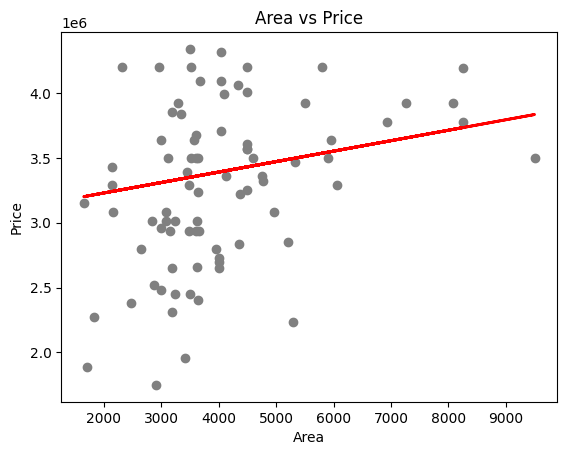

In [ ]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

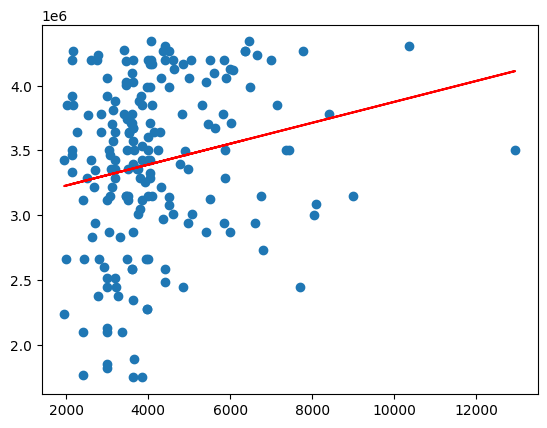

In [ ]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, slr.intercept_ + slr.coef_ * x_train, 'r')
plt.show()

In [ ]:
#Printing the model coefficients and the model itself
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  3068279.985361067
Coefficient: [80.63454916]


In [ ]:
#Prediction of Test and Training set result
y_pred_slr= slr.predict(x_test)
x_pred_slr= slr.predict(x_train)

In [ ]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
59,3920000,3.653687e+06
139,3430000,3.241241e+06
220,2800000,3.281962e+06
134,3465000,3.497256e+06
190,3080000,3.242451e+06
...,...,...
54,3990000,3.398882e+06
148,3360000,3.400494e+06
194,3010000,3.317441e+06
144,3395000,3.346469e+06


In [ ]:
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 5.69


### 05 Findings



```
# This is formatted as code
```

Explain your findings and propose an investment strategy